## Project 3

### Purpose:
The goal of this project is to import data from two similar subreddits and train a classifer to distinguish between these two subreddits. We will also try to identify distinguishing features of these subreddits. Models will be created using KNN, Logistic Regression and Random Forest. Accuracy scores will be used to measure the effectiveness of each model. We also will look at whether each subreddits posting rules have an effect on the content promoted. 


### Data:


We will collect data from two subreddits:
* r/NBA
* r/NBADiscussion
Both of theses subreddits target similar audiences, fans of the National Basketball Association. While r/NBA is for NBA news and discussions, r/NBADiscussion is tailored specifically to promote high quality discussion.
This difference is highlighted by the rules of each subreddit:


NBA
* 1.Be civil and respectful
* 2.No trolling or baiting users
* 3.No racist, sexist, or homophobic language
* 4.No reposts
* 5.No fake news
* 6.No self-promotion
* 7.No NSFW content
* 8.Posts and comments must be relevant to the NBA
* 9.Stats/Player Tweets/Quotes/Misc. Media are self-post only and must be sourced

NBADiscussion
* 1.Keep it civil.
* 2.Submit high quality content.
* 3.This is a discussion subreddit. Support claims with substantiated arguments.
* 4.Vote based on if the post or comment meets the standard of quality you expect from this subreddit.
* 5.No spam.
* 6.Attack the argument, not the person.
* 7.Most arguments can't be deconstructed in a sentence. Top level comments have a char. minimum of 100
* 8.Present descriptive, clear, and concise titles.
* 9.Present your own argument.
* 10.Posts like "Thoughts?" or "Discuss" are low effort and will be removed.
* 11.Post enough content to provide a jumping-off point. The char. minimum for posts is 350.

Notice, in NBADiscussion there is a minimum character requirement for post body content as well as for top level comments. Posts have a quality requirement in the NBADiscussion subreddit and voting is supposed to be based of if the post meets these requirements. NBA posts do not minimum character length requirements, nor do they have strict quality requirements. 

### Import Data

In [900]:
import praw
import pandas as pd

In [901]:
reddit = praw.Reddit(client_id = 'f52I39hL-ZHUzQ',     
                     client_secret = 'JuIQ7zQsj6L3rr8Ns-NXVQQSzT8', 
                     user_agent = 'redditnba',   
                     username = 'drghostpepper',      
                     password = 'HRockets*4')     

In [902]:
nba = reddit.subreddit('nba')    

In [903]:
nbadiscussion = reddit.subreddit('nbadiscussion')

#### Pull Posts

We will pull the top posts from each subreddit. The top posts will be pulled because it can help distinguish which types of posts are promoted in each subreddit. We can also see if the rules of each subreddit have an impact on the upvoted posts. 

In [7]:
nba_top = nba.top(limit = 10000)

In [8]:
nbadiscussion_top = nbadiscussion.top(limit = 10000)

#### Create a topics dictionary:

In [9]:
nba_dict = { "title":[],
                "score":[],
                "id":[],
                "url":[], 
                "comms_num": [],
                "created": [],
                "body":[]}

for item in nba_top:
    nba_dict["title"].append(item.title)
    nba_dict["score"].append(item.score)
    nba_dict["id"].append(item.id)
    nba_dict["url"].append(item.url)
    nba_dict["comms_num"].append(item.num_comments)
    nba_dict["created"].append(item.created)
    nba_dict["body"].append(item.selftext)

In [10]:
nbadiscussion_dict = { "title":[],
                "score":[],
                "id":[],
                "url":[], 
                "comms_num": [],
                "created": [],
                "body":[]}

for item in nbadiscussion_top:
    nbadiscussion_dict["title"].append(item.title)
    nbadiscussion_dict["score"].append(item.score)
    nbadiscussion_dict["id"].append(item.id)
    nbadiscussion_dict["url"].append(item.url)
    nbadiscussion_dict["comms_num"].append(item.num_comments)
    nbadiscussion_dict["created"].append(item.created)
    nbadiscussion_dict["body"].append(item.selftext)

In [24]:
nba_dict

{'title': ['[Surette] TMZ is reporting Kobe Bryant has died in a helicopter crash in Calabasas.',
  '[Charania] The NBA has suspended its season.',
  'Max Kellerman on Lebron: "It\'s called selling out. It\'s very easy to take a stand when there is low to no cost. When there is a real price to pay, then who will stand up? Mohammad Ali did. Not Lebron James"',
  "I analyzed James Harden's performance in every NBA city to see if there is a correlation between his box score and the city's average strip club rating.",
  '[Highlight] Luka Doncic hits the game-winning three point shot at the buzzer',
  'Paul Pierce admits to shitting his pants in the NBA finals against the Lakers, and faking a knee injury to go to the bathroom [VIDEO]',
  '[Megathread] Kobe Bryant has passed away at age 41',
  'Dame hits the game winner at the buzzer | TNT',
  'Kawhi sents Raptors to ECF - SNET =',
  'Journalist gets quickly shut down when she asked James Harden, Russell Westbrook if they would refrain from 

In [25]:
nbadiscussion_dict

{'title': ['With Giannis losing so early in the playoffs, it’s a clear sign that the NBA needs to announce the MVP award much earlier',
  'Kobe Bryant has died in a helicopter crash',
  'Something about Jordan that is never brought up',
  "[Post Game Thread] The Denver Nuggets defeat the Los Angeles Clippers 104-89 behind Murray's 40 points",
  'Hall of Fame guard Steve Nash has signed a four-year contract to become the next coach of the Brooklyn Nets',
  'Eric Spoelstra brilliantly waited until the last play to swarm LeBron.',
  'Klay Thompson, will you please rise up to the occasion?!',
  "Dennis Rodman won 7 straight rebounding titles in the 90's. During that time he had more offensive rebounds than field goals attempted.",
  'What takeaways can we take from the Lakers-Heat series?',
  "I feel like people are downplaying the severity of KD's achilles injury.",
  'Is the 94-95 Rockets championship the most underrated in recent history?',
  'Soft Calls will wreck the NBA',
  '[Post Ga

#### Convert Dictionaries into Dataframes

In [1504]:
dfn=pd.DataFrame(nba_dict)

dfnd=pd.DataFrame(nbadiscussion_dict)

Pulled 1000 posts from NBA subreddit and pulled 995 posts from NBADiscussion subreddit.

In [1495]:
dfn.drop(columns=['score','id','url','comms_num','created'],inplace=True)

dfnd.drop(columns=['score','id','url','comms_num','created'],inplace=True)

#### Add Subreddit Column and Concatenate Dataframes

In [1496]:
dfn['subreddit']='nba'

dfnd['subreddit']='nbadiscussion'

df=pd.concat([dfn,dfnd]).reset_index()

df.to_csv('nba_subreddits.csv')

#### Create Columns for word count and length

Creating word count and length counts to see if the minimum character lengths in the NBADiscussion subreddit has an effect on the length of posts. We will gauge the correlation between the word count/character length and subreddit classification to see if it can be used to model the data. 

In [1409]:
df['subreddit']=df['subreddit'].map({'nba':1,
                         'nbadiscussion':0})

In [1410]:
df['title_and_body']=df['title']+' '+df['body']

In [1411]:
df['title_length']=df['title'].map(len)
df['body_length']=df['body'].map(len)
df['title_and_body_length']=df['title_and_body'].map(len)
df['title_word_count']=[len(x.split()) for x in df['title']]
df['body_word_count']=[len(x.split()) for x in df['body']]
df['title_and_body_word_count']=[len(x.split()) for x in df['title_and_body']]

In [1412]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1413]:
df.groupby('subreddit').describe()['title_length']

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
0,1000.0,85.42100,50.649730,12.0,49.0,74.0,106.0,300.0
1,995.0,109.59196,73.288331,10.0,53.0,89.0,145.5,300.0


In [1414]:
df.groupby('subreddit').describe()['body_length']

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
0,1000.0,2850.18100,4641.502812,0.0,679.5,1392.0,2729.25,39980.0
1,995.0,328.38191,1138.890270,0.0,0.0,0.0,118.50,14078.0


In [1415]:
df.groupby('subreddit').describe()['title_word_count']

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
0,1000.0,14.824000,8.917766,2.0,9.0,13.0,18.0,55.0
1,995.0,18.962814,13.112715,2.0,9.0,15.0,25.0,62.0


In [1416]:
df.groupby('subreddit').describe()['body_word_count']

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
0,1000.0,459.235000,751.173468,0.0,103.0,211.0,444.25,7048.0
1,995.0,40.253266,158.675650,0.0,0.0,0.0,16.00,2520.0


#### Question Mark

In [1417]:
df['title_question_mark']=df['title'].str.find('?').map({-1:0}).replace(np.nan,1)

In [1418]:
df['body_question_mark']=df['body'].str.find('?').map({-1:0}).replace(np.nan,1)

In [1419]:
df.groupby('subreddit').sum()['title_question_mark']

subreddit
0    388.0
1     51.0
Name: title_question_mark, dtype: float64

In [1420]:
df.groupby('subreddit').sum()['body_question_mark']

subreddit
0    604.0
1    100.0
Name: body_question_mark, dtype: float64

In [1421]:
#df.drop(columns=['body_question_mark','title_question_mark'],inplace=True)

Notice, posts from NBADiscussion have a higher chance of containing a '?' then those from NBA. 
* NBADiscussion = 39% of titles have a question mark
* NBA = 5.1% of titles have a question mark

* NBADiscussion = 60.7% of post body have a question mark
* NBA = 10% of post body have a question mark

The discrepancy in question mark counts in post body's could be due to the fact that body word counts in NBADiscussion are so much highter. 

#### Exclamation Mark

In [1422]:
df['title_exclamation_mark']=df['title'].str.find('!').map({-1:0}).replace(np.nan,1)

In [1423]:
df['body_exclamation_mark']=df['body'].str.find('!').map({-1:0}).replace(np.nan,1)

In [1424]:
df.groupby('subreddit').sum()['title_exclamation_mark']

subreddit
0     8.0
1    45.0
Name: title_exclamation_mark, dtype: float64

In [1425]:
df.groupby('subreddit').sum()['body_exclamation_mark']

subreddit
0    129.0
1     42.0
Name: body_exclamation_mark, dtype: float64

In [1426]:
#df.drop(columns=['body_exclamation_mark','title_exclamation_mark'],inplace=True)

Exclamation marks are more likely to occurr in the title of NBA posts but in the body of posts, exclamation marks are more likely to be found in NBADiscussion. The high number of exclamation marks in the body could just be due to the high character count of NBADiscussion posts. 

#### Period

In [1427]:
df['title_period']=df['title'].str.find('.').map({-1:0}).replace(np.nan,1)

In [1428]:
df['body_period']=df['body'].str.find('.').map({-1:0}).replace(np.nan,1)

In [1429]:
df.groupby('subreddit').sum()['title_period']

subreddit
0    237.0
1    447.0
Name: title_period, dtype: float64

In [1430]:
df.groupby('subreddit').sum()['body_period']

subreddit
0    953.0
1    258.0
Name: body_period, dtype: float64

In [1431]:
#df.drop(columns=['body_period','title_period'],inplace=True)

Periods are more likely to occurr in the title of NBA posts but in the body of posts, periods are more likely to be found in NBADiscussion. The high number of periods in the body could just be due to the high character count of NBADiscussion posts.

# T-test

Run t-test on lengths and words counts to see if there is a statistically significant difference between the two subreddits.
* significance level: 𝛼=0.05
* null hypothesis: 
    * There is no significant difference in character length of subreddit post titles and post body text between subreddits. 
    * There is no significant difference in word counts of subreddit post titles and post body text between subreddits.

In [1432]:
import scipy.stats
from scipy import stats

In [1433]:
def t_test(char):
    return stats.ttest_ind(df[df['subreddit']==0][char],
                           df[df['subreddit']==1][char],
                           equal_var=False)

In [1434]:
print(t_test('title_length'))
print(t_test('body_length'))
print(t_test('title_word_count'))
print(t_test('body_word_count'))

Ttest_indResult(statistic=-8.565251509049954, pvalue=2.3094744995393926e-17)
Ttest_indResult(statistic=16.68378511328246, pvalue=5.577696431562364e-56)
Ttest_indResult(statistic=-8.239258748172793, pvalue=3.354340021679087e-16)
Ttest_indResult(statistic=17.255551768772598, pvalue=3.651058982683865e-59)


There is a statistically significant difference between subreddits in terms of lengths and word counts of titles and body of posts. 

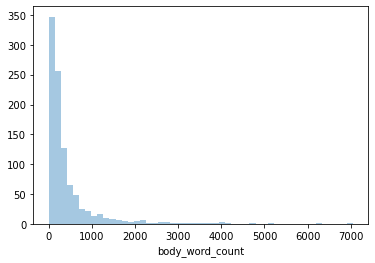

In [1435]:

sns.distplot(df['body_word_count'][df['subreddit']==0],kde=False);

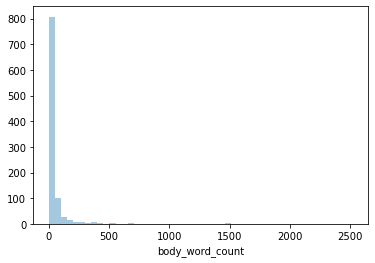

In [1436]:
sns.distplot(df['body_word_count'][df['subreddit']==1],kde=False);

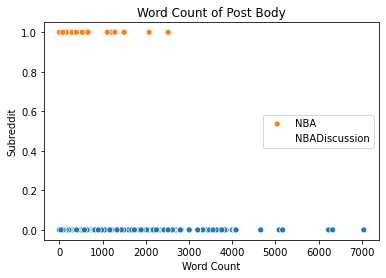

In [1465]:
sns.scatterplot('body_word_count','subreddit',data=df,hue='subreddit')

plt.title('Word Count of Post Body')
plt.xlabel('Word Count')
plt.ylabel('Subreddit')
plt.legend(labels=['NBA','NBADiscussion'],loc='center right')

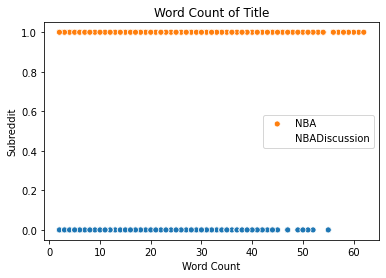

In [1438]:
sns.scatterplot('title_word_count','subreddit',data=df,hue='subreddit')
plt.title('Word Count of Title')
plt.xlabel('Word Count')
plt.ylabel('Subreddit')
plt.legend(labels=['NBA','NBADiscussion']);

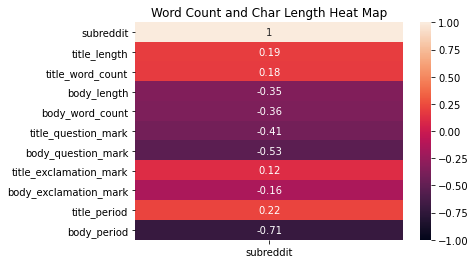

In [1464]:
corr=df[['subreddit','title_length', 'title_word_count','body_length','body_word_count','title_question_mark','body_question_mark','title_exclamation_mark','body_exclamation_mark','title_period','body_period']].corr()
sns.heatmap(corr[['subreddit']],vmin=-1,vmax=1,annot=True)
plt.title('Word Count and Char Length Heat Map');

#### Note:  
* title length/word count is positively correlated with the subreddit (longer titles mean its more likely to belong to NBA subreddit) 
* body length/word count is negative correlated with the subreddit (longer body text means its more likely to be long to NBADiscussion subreddit)

Use body word count and title word count for analysis instead of length values because word count and length are highly correlated. Using word count instead of length values because it is easier to interpret word count.

Punctuation seems to be highly correlated with subreddits. Question marks in titles and periods in body paragraphs are highly correlated with NBADiscussion while periods in the title lean towards NBA.  


In [1440]:
df[df['body_length']==0].groupby('subreddit').count()['body']

subreddit
0     39
1    731
Name: body, dtype: int64

Out of 1000 posts in NBA, 731 have an empty body compared to only 39 out of the 995 NBADiscussion posts. Note that NBADiscussion has a minimum body char length of 350.

# Modeling

In [1441]:
X=df.drop(columns=['subreddit','index','body','title','title_length', 'body_length',
       'title_and_body_length', 'title_and_body_word_count'])
y=df['subreddit']

In [1442]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

In [1443]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y, random_state=42)

In [1444]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [1488]:
cvec=CountVectorizer(tokenizer=LemmaTokenizer(),stop_words='english')

In [1446]:
cvec.fit(X_train['title_and_body'])
X_train_c=cvec.transform(X_train['title_and_body'])
X_test_c=cvec.transform(X_test['title_and_body'])
X_train_c=pd.DataFrame(X_train_c.todense(),columns=cvec.get_feature_names(),index=X_train.index)
X_test_c=pd.DataFrame(X_test_c.todense(),columns=cvec.get_feature_names(),index=X_test.index)

C:\Users\smoha.LAPTOP-D47U0QA5\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [1447]:
# tv=TfidfVectorizer()

# tv.fit(X_train['title_and_body'])
# X_train_t=tv.transform(X_train['title_and_body'])
# X_test_t=tv.transform(X_test['title_and_body'])
# X_train_t=pd.DataFrame(X_train_t.todense(),columns=cvec.get_feature_names(),index=X_train.index)
# X_test_t=pd.DataFrame(X_test_t.todense(),columns=cvec.get_feature_names(),index=X_test.index)

Used TfidfVectorizer but did not see much improvement in scores.

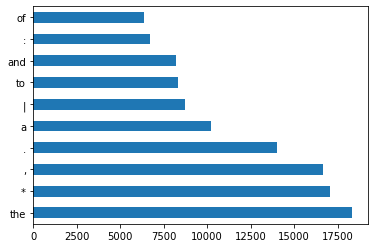

In [1448]:
X_train_c[X_train_c['subreddit']==0].sum(). \
sort_values(ascending=False).head(10).plot(kind='barh');

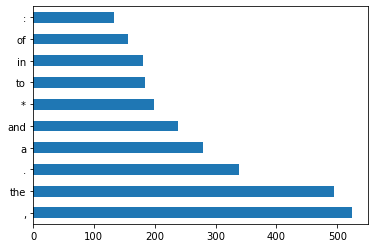

In [1449]:
X_train_c[X_train_c['subreddit']==1].sum(). \
sort_values(ascending=False).head(10).plot(kind='barh');

# KNN

In [1450]:
# X_train=X_train.drop(columns=['index','title','body','title_and_body'])
# y_train=y_train.drop(columns=['index','title','body','title_and_body'])

# X_test=X_test.drop(columns=['index','title','body','title_and_body'])
# y_test=y_test.drop(columns=['index','title','body','title_and_body'])

In [1451]:
X_train_cvec=X_train.drop(columns='title_and_body').merge(X_train_c,left_index=True,right_index=True)
X_test_cvec=X_test.drop(columns='title_and_body').merge(X_test_c,left_index=True,right_index=True)

In [1452]:
X_train_tv=X_train.drop(columns='title_and_body').merge(X_train_t,left_index=True,right_index=True)
X_test_tv=X_test.drop(columns='title_and_body').merge(X_test_t,left_index=True,right_index=True)

In [1476]:
sc=StandardScaler()
X_train_cvec_sc=sc.fit_transform(X_train_cvec)
X_test_cvec_sc=sc.transform(X_test_cvec)

Standard Scaler did not improve accuracy scores.

In [1199]:
knn=KNeighborsClassifier()

knn.fit(X_train.drop(columns='title_and_body'),y_train)

knn.score(X_train.drop(columns='title_and_body'),y_train),knn.score(X_test.drop(columns='title_and_body'),y_test)

(0.9124331550802139, 0.8817635270541082)

In [1200]:
knn=KNeighborsClassifier()

knn.fit(X_train_c,y_train)

knn.score(X_train_c,y_train),knn.score(X_test_c,y_test)

(0.8883689839572193, 0.8416833667334669)

In [1201]:
knn=KNeighborsClassifier()

knn.fit(X_train_cvec,y_train)

knn.score(X_train_cvec,y_train),knn.score(X_test_cvec,y_test)

(0.9191176470588235, 0.8817635270541082)

# Logistic Regression

In [975]:
lr=LogisticRegressionCV(max_iter=10000)
lr.fit(X_train.drop(columns='title_and_body'),y_train)
lr.score(X_train.drop(columns='title_and_body'),y_train),lr.score(X_test.drop(columns='title_and_body'),y_test)

(0.838903743315508, 0.8276553106212425)

In [1030]:
lr=LogisticRegressionCV(max_iter=1000)
lr.fit(X_train_c,y_train)
lr.score(X_train_c,y_train),lr.score(X_test_c,y_test)

(0.9899732620320856, 0.8977955911823647)

In [1477]:
lr=LogisticRegressionCV(max_iter=10000)
lr.fit(X_train_cvec,y_train)
lr.score(X_train_cvec,y_train),lr.score(X_test_cvec,y_test)

(1.0, 0.8797595190380761)

In [1458]:
lr=LogisticRegressionCV(max_iter=10000,Cs=2)
params_lr={
    'Cs':[.5,1,2],
    'fit_intercept':[True,False],    
}
gs=GridSearchCV(lr,params_lr,cv=5)
gs.fit(X_train_cvec,y_train)
print(f'Best Score: {gs.best_score_}')
print(f'Best Score: {gs.best_params_}')
gs.score(X_train_cvec,y_train),gs.score(X_test_cvec,y_test)

C:\Users\smoha.LAPTOP-D47U0QA5\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\smoha.LAPTOP-D47U0QA5\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\smoha.LAPTOP-D47U0QA5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1885, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\smoha.LAPTOP-D47U0QA5\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\smoha.LAPTOP-D47U0QA5\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\smoha.LAPTOP-D47U0QA5\anaconda3\lib\site

C:\Users\smoha.LAPTOP-D47U0QA5\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\smoha.LAPTOP-D47U0QA5\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\smoha.LAPTOP-D47U0QA5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1885, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\smoha.LAPTOP-D47U0QA5\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\smoha.LAPTOP-D47U0QA5\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\smoha.LAPTOP-D47U0QA5\anaconda3\lib\site

C:\Users\smoha.LAPTOP-D47U0QA5\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\smoha.LAPTOP-D47U0QA5\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\smoha.LAPTOP-D47U0QA5\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1885, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\smoha.LAPTOP-D47U0QA5\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\smoha.LAPTOP-D47U0QA5\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\smoha.LAPTOP-D47U0QA5\anaconda3\lib\site

Best Score: 0.8963790412486065
Best Score: {'Cs': 2, 'fit_intercept': True}


(1.0, 0.8917835671342685)

In [1507]:
coef_df=pd.DataFrame({"Feature":X_train_cvec.columns.tolist(),"Coefficients":lr.coef_[0]})
top_nba_discussion=pd.DataFrame(coef_df.sort_values('Coefficients').head(20))
top_nba=pd.DataFrame(coef_df.sort_values('Coefficients').tail(20))

In [1508]:
top_nba=top_nba.sort_values('Coefficients',ascending=False)
top_nba['Odds']=np.exp(top_nba['Coefficients'])

In [1509]:
top_nba_discussion=top_nba_discussion.sort_values('Coefficients',ascending=True)
top_nba_discussion['Odds']=np.exp(top_nba_discussion['Coefficients'])
top_nba_discussion['Odds']=top_nba_discussion['Odds']**-1


In [1510]:
top_nba_discussion[['Feature','Odds']]

,Feature,Odds
7,body_period,1.997944
7578,boycott,1.762734
2,title_question_mark,1.693899
20773,stanley,1.563753
3,body_question_mark,1.534229
6049,afford,1.484058
14238,kennedy,1.459094
12920,hofers,1.441668
7790,bullock,1.407095
15816,mirotic,1.377965


In [1511]:
top_nba[['Feature','Odds']]

,Feature,Odds
4,title_exclamation_mark,2.474631
8315,charania,2.335245
23623,wojnarowski,1.826165
4109,3-2,1.747158
21509,tell,1.549037
10783,espn,1.257656
4711,43/17/13,1.256887
22250,triple-double,1.251662
16526,notified,1.219121
4216,30/6/7,1.213328


# Random Forests

In [1017]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


In [980]:
rf=RandomForestClassifier()
rf.fit(X_train.drop(columns='title'),y_train)
rf.score(X_train.drop(columns='title'),y_train),rf.score(X_test.drop(columns='title'),y_test)

(0.9772727272727273, 0.87374749498998)

In [1033]:
rf=RandomForestClassifier()
rf.fit(X_train_c,y_train)
rf.score(X_train_c,y_train),rf.score(X_test_c,y_test)

(0.9993315508021391, 0.8637274549098196)

In [1032]:
rf=RandomForestClassifier()
rf.fit(X_train_cvec,y_train)
rf.score(X_train_cvec,y_train),rf.score(X_test_cvec,y_test)

(0.9993315508021391, 0.8657314629258517)

In [1454]:
params_rf={
    'n_estimators':[75,100,125],
    'max_depth':[None,1,2,3],
    'max_features':[None,'auto','sqrt','log2'],    
}
gs=GridSearchCV(rf,params_rf,cv=5)
gs.fit(X_train_cvec,y_train)
print(f'Best Score: {gs.best_score_}')
print(f'Best Score: {gs.best_params_}')
gs.score(X_train_cvec,y_train),gs.score(X_test_cvec,y_test)

Best Score: 0.8997190635451504
Best Score: {'max_depth': None, 'max_features': None, 'n_estimators': 75}


(1.0, 0.8837675350701403)

## Accuracy Scores

| Data                                           | KNN Train | KNN Test | LR Train | LR Test  | RF Train | RF Test  |
|------------------------------------------------|-----------|----------|----------|----------|----------|----------|
| Word Counts Only (title and body)              | 0.912433  | 0.877755 | 0.838903 | 0.827655 | 0.977272 | 0.873747 |
| Title Vectorized (c)                           | 0.766042  | 0.619238 | 0.962566 | 0.819639 | 0.998663 | 0.787575 |
| Title Vectorized and Word Counts (cvec)        | 0.921791  | 0.877755 | 0.915775 | 0.861723 | 0.999331 | 0.879759 |
| Body Vectorized (c)                            | 0.866978  | 0.803607 | 0.978609 | 0.889779 | 0.978609 | 0.871743 |
| Body Vectorized and Word Counts (cvec)         | 0.915106  | 0.887775 | 0.959893 | 0.879759 | 0.981951 | 0.873747 |
| Title & Body Vectorized (c)                    | 0.841577  | 0.811623 | 0.989973 | 0.897795 | 0.999331 | 0.863727 |
| Title & Body Vectorized  Word Counts (cvec) | 0.915106  | 0.889779 | 0.969919 | 0.897795 | 0.999331 | 0.865731 |

# Conclusion

The models all performed well on classifying data. This may be due to the large word count differences between the two subreddits. Taking out stop words seems to decrease accuracy and this again may be due to large word count. Adding punctuation improved scores probably due to the high correlations of punctuations. 

NBADiscussion subreddits seem to ask more questions and have large word counts in the body of the post. NBA bodies usually are smaller and their titles are larger. This is in line with polices of the NBADiscussion subreddit which has minimum character counts for posts bodies and expect titles to be concise. Also, posts have higher amount of question marks because they may ask more questions to spur discusssion. 

#### Further Areas of Study
* Sentiment analysis of each subreddit

* Study vocabulary used in each subreddit

* Study vectorized data again but account for word count
